## 1. Data Preparation

In [4]:
!pip install pytickersymbols

  Obtaining dependency information for pytickersymbols from https://files.pythonhosted.org/packages/6e/82/53c60fe410b1aff52f4edb87bb7791eb574f1db57526f44b1e8942e30016/pytickersymbols-1.15.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/79.7 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/79.7 kB ? eta -:--:--
   -------------------- ------------------- 41.0/79.7 kB 393.8 kB/s eta 0:00:01
   ---------------------------------------- 79.7/79.7 kB 631.5 kB/s eta 0:00:00


In [6]:
import yfinance as yf
from pytickersymbols import PyTickerSymbols

stock_data = PyTickerSymbols()
indices = stock_data.get_all_indices()
indices

['BEL 20',
 'NASDAQ 100',
 'MOEX',
 'CAC Mid 60',
 'DOW JONES',
 'S&P 100',
 'OMX Helsinki 25',
 'FTSE 100',
 'S&P 600',
 'TECDAX',
 'DAX',
 'OMX Stockholm 30',
 'CAC 40',
 'Switzerland 20',
 'SDAX',
 'IBEX 35',
 'S&P 500',
 'CDAX',
 'EURO STOXX 50',
 'MDAX',
 'AEX']

We choose the following indices that also appear in the paper and is available to get all constituent tickers through the above package for ease of data downloading: NASDAQ 100, FTSE 100, CAC 40, DAX.

In [13]:
# Check methods for getting relevant index tickers data (for purposes of using them to download from yahoo finance)
list(filter(lambda x: x.endswith('_nyc_yahoo_tickers'), dir(stock_data)))

['get_aex_nyc_yahoo_tickers',
 'get_bel_20_nyc_yahoo_tickers',
 'get_cac_40_nyc_yahoo_tickers',
 'get_cac_mid_60_nyc_yahoo_tickers',
 'get_cdax_nyc_yahoo_tickers',
 'get_dax_nyc_yahoo_tickers',
 'get_dow_jones_nyc_yahoo_tickers',
 'get_euro_stoxx_50_nyc_yahoo_tickers',
 'get_ftse_100_nyc_yahoo_tickers',
 'get_ibex_35_nyc_yahoo_tickers',
 'get_mdax_nyc_yahoo_tickers',
 'get_moex_nyc_yahoo_tickers',
 'get_nasdaq_100_nyc_yahoo_tickers',
 'get_omx_helsinki_25_nyc_yahoo_tickers',
 'get_omx_stockholm_30_nyc_yahoo_tickers',
 'get_sdax_nyc_yahoo_tickers',
 'get_sp_100_nyc_yahoo_tickers',
 'get_sp_500_nyc_yahoo_tickers',
 'get_sp_600_nyc_yahoo_tickers',
 'get_switzerland_20_nyc_yahoo_tickers',
 'get_tecdax_nyc_yahoo_tickers']

In [14]:
# Retrieve ticker symbols (for yahoo finance) from above methods
indices = {
    'NASDAQ 100': stock_data.get_nasdaq_100_nyc_yahoo_tickers(),
    'FTSE 100': stock_data.get_ftse_100_nyc_yahoo_tickers(),
    'CAC 40': stock_data.get_cac_40_nyc_yahoo_tickers(),
    'DAX': stock_data.get_dax_nyc_yahoo_tickers()
}

indices

{'NASDAQ 100': ['AZN',
  'AZNCF',
  'AAPL',
  'CSCO',
  'INTC',
  'MSFT',
  'WBA',
  'ATVI',
  'ADBE',
  'GOOGL',
  'GOOG',
  'AMZN',
  'AMGN',
  'ADI',
  'AMAT',
  'ADSK',
  'ADP',
  'BIDU',
  'BAIDF',
  'BIIB',
  'CHTR',
  'CTSH',
  'CMCSA',
  'COST',
  'CSX',
  'DLTR',
  'EBAY',
  'EA',
  'FAST',
  'FISV',
  'FI',
  'GILD',
  'ILMN',
  'INTU',
  'ISRG',
  'JD',
  'JDCMF',
  'KHC',
  'LRCX',
  'MAR',
  '0P0000KQL0',
  '0P0001I1JH',
  'MCHP',
  'MU',
  'MDLZ',
  'MNST',
  'NTES',
  'NETTF',
  'NFLX',
  'NVDA',
  'NXPI',
  'ORLY',
  'PCAR',
  'PAYX',
  'PYPL',
  'QCOM',
  'REGN',
  'ROST',
  'SIRI',
  'SWKS',
  'SBUX',
  'TMUS',
  'TSLA',
  'TXN',
  'VRSK',
  'VRTX',
  'BKNG',
  'EXC',
  'HON',
  'AMD',
  'ALGN',
  'AEP',
  'ANSS',
  'AVGO',
  'CDNS',
  'CTAS',
  'STZ',
  'CEG',
  'CPRT',
  'FTNT',
  'IDXX',
  'KLAC',
  'SNPS',
  'VRSN',
  'ASMLF',
  'ASML',
  'DXCM',
  'ODFL',
  'PEP',
  'XEL',
  'TEAM',
  'DOCU',
  'KDP',
  'LULU',
  'MRVL',
  'MTCH',
  'MELI',
  'MRNA',
  'OKTA',
  

In [18]:
# Collect daily price data
from tqdm import tqdm

start_date, end_date = '2000-01-01', '2018-08-16' # same as denoted in the paper

data = {
    'NASDAQ 100': {},
    'FTSE 100': {},
    'CAC 40': {},
    'DAX': {}
}

for index in indices:
    print(index)
    for ticker in tqdm(indices[index]):
        
        try:
            data[index][ticker] = yf.download(ticker, start=start_date, end=end_date)[['Adj Close']]
        except Exception as e:
            continue
            
data

NASDAQ 100


[*********************100%%**********************]  1 of 1 completed                           | 0/112 [00:00<?, ?it/s]
[*********************100%%**********************]  1 of 1 completed                   | 1/112 [00:00<01:11,  1.55it/s]
[*********************100%%**********************]  1 of 1 completed                   | 2/112 [00:00<00:38,  2.86it/s]
[*********************100%%**********************]  1 of 1 completed                   | 3/112 [00:00<00:26,  4.18it/s]
[*********************100%%**********************]  1 of 1 completed                   | 4/112 [00:01<00:24,  4.48it/s]
[*********************100%%**********************]  1 of 1 completed                   | 5/112 [00:01<00:24,  4.40it/s]
[*********************100%%**********************]  1 of 1 completed                   | 6/112 [00:01<00:25,  4.18it/s]
[*********************100%%**********************]  1 of 1 completed                   | 7/112 [00:01<00:25,  4.19it/s]

1 Failed download:
['ATVI']: Exception(

[*********************100%%**********************]  1 of 1 completed                  | 61/112 [00:22<00:15,  3.33it/s]
[*********************100%%**********************]  1 of 1 completed                  | 62/112 [00:22<00:14,  3.54it/s]
[*********************100%%**********************]  1 of 1 completed                  | 63/112 [00:22<00:11,  4.21it/s]
[*********************100%%**********************]  1 of 1 completed                  | 64/112 [00:22<00:12,  3.77it/s]
[*********************100%%**********************]  1 of 1 completed                  | 65/112 [00:22<00:10,  4.43it/s]
[*********************100%%**********************]  1 of 1 completed                  | 66/112 [00:23<00:10,  4.44it/s]
[*********************100%%**********************]  1 of 1 completed                  | 67/112 [00:23<00:11,  3.81it/s]
[*********************100%%**********************]  1 of 1 completed                  | 68/112 [00:24<00:14,  2.98it/s]
[*********************100%%*************

FTSE 100


[*********************100%%**********************]  1 of 1 completed                           | 0/180 [00:00<?, ?it/s]
[*********************100%%**********************]  1 of 1 completed                   | 1/180 [00:00<00:25,  6.97it/s]
[*********************100%%**********************]  1 of 1 completed                   | 2/180 [00:00<00:29,  6.07it/s]
[*********************100%%**********************]  1 of 1 completed                   | 3/180 [00:00<00:30,  5.90it/s]
[*********************100%%**********************]  1 of 1 completed                   | 4/180 [00:00<00:28,  6.16it/s]
[*********************100%%**********************]  1 of 1 completed                   | 5/180 [00:00<00:26,  6.72it/s]
[*********************100%%**********************]  1 of 1 completed                   | 6/180 [00:00<00:24,  7.15it/s]
[*********************100%%**********************]  1 of 1 completed                   | 7/180 [00:01<00:23,  7.30it/s]
[*********************100%%*************

[*********************100%%**********************]  1 of 1 completed                  | 62/180 [00:16<00:40,  2.90it/s]

1 Failed download:
['HRGLY']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed                  | 63/180 [00:18<01:11,  1.63it/s]
[*********************100%%**********************]  1 of 1 completed                  | 64/180 [00:18<00:54,  2.12it/s]
[*********************100%%**********************]  1 of 1 completed                  | 65/180 [00:18<00:48,  2.38it/s]
[*********************100%%**********************]  1 of 1 completed                  | 66/180 [00:18<00:40,  2.81it/s]
[*********************100%%**********************]  1 of 1 completed                  | 67/180 [00:18<00:33,  3.40it/s]
[*********************100%%**********************]  1 of 1 completed                  | 68/180 [00:19<00:32,  3.46it/s]
[*********************100%%**********************]  1 of 1 compl

[*********************100%%**********************]  1 of 1 completed                 | 122/180 [00:36<00:25,  2.31it/s]
[*********************100%%**********************]  1 of 1 completed                 | 123/180 [00:36<00:20,  2.83it/s]
[*********************100%%**********************]  1 of 1 completed                 | 124/180 [00:37<00:18,  3.09it/s]
[*********************100%%**********************]  1 of 1 completed                 | 125/180 [00:37<00:22,  2.48it/s]
[*********************100%%**********************]  1 of 1 completed                 | 126/180 [00:37<00:18,  2.86it/s]
[*********************100%%**********************]  1 of 1 completed                 | 127/180 [00:38<00:16,  3.23it/s]
[*********************100%%**********************]  1 of 1 completed                 | 128/180 [00:38<00:14,  3.55it/s]
[*********************100%%**********************]  1 of 1 completed                 | 129/180 [00:38<00:12,  4.05it/s]
[*********************100%%*************

[*********************100%%**********************]  1 of 1 completed██████████████▊  | 175/180 [01:03<00:04,  1.17it/s]

1 Failed download:
['HLN']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
[*********************100%%**********************]  1 of 1 completed███████████████▏ | 176/180 [01:04<00:03,  1.09it/s]
[*********************100%%**********************]  1 of 1 completed███████████████▋ | 177/180 [01:04<00:02,  1.47it/s]
[*********************100%%**********************]  1 of 1 completed████████████████ | 178/180 [01:04<00:01,  1.84it/s]

1 Failed download:
['HMSVF']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed████████████████▌| 179/180 [01:05<00:00,  1.48it/s]
100%|████████████████████████████████████████████████████████████████████████████████| 180/180 [01:05<00:00,  2.74it/s]


CAC 40


[*********************100%%**********************]  1 of 1 completed                            | 0/71 [00:00<?, ?it/s]
[*********************100%%**********************]  1 of 1 completed                    | 1/71 [00:00<00:10,  6.53it/s]
[*********************100%%**********************]  1 of 1 completed                    | 2/71 [00:00<00:13,  5.16it/s]
[*********************100%%**********************]  1 of 1 completed                    | 3/71 [00:00<00:17,  3.88it/s]
[*********************100%%**********************]  1 of 1 completed                    | 4/71 [00:00<00:14,  4.51it/s]
[*********************100%%**********************]  1 of 1 completed                    | 5/71 [00:01<00:17,  3.84it/s]
[*********************100%%**********************]  1 of 1 completed                    | 6/71 [00:01<00:20,  3.20it/s]
[*********************100%%**********************]  1 of 1 completed                    | 7/71 [00:01<00:16,  3.91it/s]
[*********************100%%*************

[*********************100%%**********************]  1 of 1 completed█████████▊         | 63/71 [00:16<00:03,  2.35it/s]
[*********************100%%**********************]  1 of 1 completed██████████▉        | 64/71 [00:17<00:02,  2.91it/s]
[*********************100%%**********************]  1 of 1 completed████████████       | 65/71 [00:17<00:01,  3.52it/s]
[*********************100%%**********************]  1 of 1 completed█████████████▏     | 66/71 [00:17<00:01,  4.00it/s]
[*********************100%%**********************]  1 of 1 completed██████████████▍    | 67/71 [00:17<00:00,  4.42it/s]
[*********************100%%**********************]  1 of 1 completed███████████████▌   | 68/71 [00:17<00:00,  4.97it/s]
[*********************100%%**********************]  1 of 1 completed████████████████▋  | 69/71 [00:17<00:00,  5.22it/s]
[*********************100%%**********************]  1 of 1 completed█████████████████▊ | 70/71 [00:18<00:00,  5.90it/s]
100%|███████████████████████████████████

DAX


[*********************100%%**********************]  1 of 1 completed                            | 0/71 [00:00<?, ?it/s]
[*********************100%%**********************]  1 of 1 completed                    | 1/71 [00:00<00:10,  6.39it/s]
[*********************100%%**********************]  1 of 1 completed                    | 2/71 [00:00<00:13,  5.08it/s]

1 Failed download:
['AZSEY']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed                    | 3/71 [00:01<00:32,  2.09it/s]
[*********************100%%**********************]  1 of 1 completed                    | 4/71 [00:01<00:27,  2.41it/s]
[*********************100%%**********************]  1 of 1 completed                    | 5/71 [00:01<00:20,  3.19it/s]
[*********************100%%**********************]  1 of 1 completed                    | 6/71 [00:01<00:20,  3.22it/s]
[*********************100%%**********************]  1 of 1 compl

[*********************100%%**********************]  1 of 1 completed████████████       | 65/71 [00:16<00:01,  3.30it/s]
[*********************100%%**********************]  1 of 1 completed█████████████▏     | 66/71 [00:16<00:01,  4.11it/s]

1 Failed download:
['SMEGF']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
[*********************100%%**********************]  1 of 1 completed██████████████▍    | 67/71 [00:16<00:01,  2.51it/s]

1 Failed download:
['SMNEY']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
[*********************100%%**********************]  1 of 1 completed███████████████▌   | 68/71 [00:17<00:01,  1.96it/s]
[*********************100%%**********************]  1 of 1 completed████████████████▋  | 69/71 [00:18<00:00,  2.17it/s]

1 Failed download:
['DTRUY']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
[*********************100%%**********

{'NASDAQ 100': {'AZN':             Adj Close
  Date                 
  2000-01-03   8.473514
  2000-01-04   8.190206
  2000-01-05   8.228840
  2000-01-06   8.203084
  2000-01-07   8.550783
  ...               ...
  2018-08-09  34.165321
  2018-08-10  33.966930
  2018-08-13  33.656422
  2018-08-14  33.621918
  2018-08-15  33.164768
  
  [4685 rows x 1 columns],
  'AZNCF':             Adj Close
  Date                 
  2009-02-13  25.431568
  2009-02-17  25.431568
  2009-02-18  25.431568
  2009-02-19  25.431568
  2009-02-20  24.163416
  ...               ...
  2018-08-09  66.763382
  2018-08-10  66.763382
  2018-08-13  66.763382
  2018-08-14  66.763382
  2018-08-15  66.763382
  
  [2393 rows x 1 columns],
  'AAPL':             Adj Close
  Date                 
  2000-01-03   0.846127
  2000-01-04   0.774790
  2000-01-05   0.786128
  2000-01-06   0.718098
  2000-01-07   0.752113
  ...               ...
  2018-08-09  49.709061
  2018-08-10  49.560997
  2018-08-13  49.881008
  2018-08-14  

In [19]:
for index in data:
    print(len(data[index])) # check total number of assets per index

112
180
71
71


In [20]:
for index in data:
    num = 0
    for ticker in data[index]: # check total number of assets with whole data from start to end
        if len(data[index][ticker]) == 4685:
            num += 1
    print(num)

61
23
9
14


In [23]:
# Exclude assets that do not have whole data for the total period
import pandas as pd

final_data = {
    'NASDAQ 100':None,
    'FTSE 100': None,
    'CAC 40': None,
    'DAX': None
}

for index in data:
    print(index)
    cur_dfs = []
    for ticker in tqdm(data[index]):
        if len(data[index][ticker]) == 4685:
            cur_df = data[index][ticker]
            cur_df.columns = [ticker]
            cur_dfs.append(cur_df)
    final_data[index] = pd.concat(cur_dfs, axis=1)

final_data

NASDAQ 100


100%|██████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 7730.55it/s]


FTSE 100


100%|█████████████████████████████████████████████████████████████████████████████| 180/180 [00:00<00:00, 35994.03it/s]


CAC 40


100%|███████████████████████████████████████████████████████████████████████████████| 71/71 [00:00<00:00, 35460.30it/s]


DAX


100%|███████████████████████████████████████████████████████████████████████████████| 71/71 [00:00<00:00, 23679.67it/s]


{'NASDAQ 100':                   AZN       AAPL       CSCO       INTC        MSFT        WBA  \
 Date                                                                            
 2000-01-03   8.473514   0.846127  36.641258  24.867403   36.065586  17.314310   
 2000-01-04   8.190206   0.774790  34.585621  23.706215   34.847275  16.670219   
 2000-01-05   8.228840   0.786128  34.479652  23.902731   35.214684  16.859659   
 2000-01-06   8.203084   0.718098  33.907475  22.509296   34.035061  16.367134   
 2000-01-07   8.550783   0.752113  35.899540  23.438251   34.479862  16.783884   
 ...               ...        ...        ...        ...         ...        ...   
 2018-08-09  34.165321  49.709061  36.778042  43.153709  103.106178  51.561920   
 2018-08-10  33.966930  49.560997  36.778042  42.043446  102.476257  51.811268   
 2018-08-13  33.656422  49.881008  36.752842  41.699184  101.733559  51.803482   
 2018-08-14  33.621918  50.091167  36.962849  41.415165  103.002747  53.502220   
 2

In [24]:
# Prepare returns data and split train-test
train_data = {
    'NASDAQ 100':None,
    'FTSE 100': None,
    'CAC 40': None,
    'DAX': None
}

test_data = {
    'NASDAQ 100':None,
    'FTSE 100': None,
    'CAC 40': None,
    'DAX': None
}

for index in final_data: # same split as in paper
    cur = final_data[index].pct_change().dropna()
    train_data[index] = cur[cur.index <= '2015-11-03']
    test_data[index] = cur[cur.index >= '2015-11-04']
    
train_data

{'NASDAQ 100':                  AZN      AAPL      CSCO      INTC      MSFT       WBA  \
 Date                                                                     
 2000-01-04 -0.033435 -0.084310 -0.056102 -0.046695 -0.033780 -0.037200   
 2000-01-05  0.004717  0.014633 -0.003064  0.008290  0.010543  0.011364   
 2000-01-06 -0.003130 -0.086539 -0.016595 -0.058296 -0.033498 -0.029213   
 2000-01-07  0.042386  0.047369  0.058750  0.041270  0.013069  0.025463   
 2000-01-10 -0.003012 -0.017588  0.037190  0.045732  0.007291  0.029345   
 ...              ...       ...       ...       ...       ...       ...   
 2015-10-28  0.024235  0.041205  0.010671  0.006962  0.005401 -0.107293   
 2015-10-29  0.003736  0.010564 -0.007493 -0.019591 -0.011486 -0.012596   
 2015-10-30 -0.010856 -0.008545 -0.009952 -0.004996 -0.013493  0.009538   
 2015-11-02  0.012543  0.014059 -0.002773  0.007383  0.011398  0.022083   
 2015-11-03  0.000619  0.011470 -0.005561  0.005863  0.017092  0.019411   
 
         

In [25]:
test_data

{'NASDAQ 100':                  AZN      AAPL      CSCO      INTC      MSFT       WBA  \
 Date                                                                     
 2015-11-04 -0.005571 -0.004650 -0.004893  0.002348  0.004617 -0.008500   
 2015-11-05  0.012138 -0.004610 -0.001405 -0.004393 -0.000368 -0.017490   
 2015-11-06 -0.013223  0.001158  0.000704 -0.004706  0.009930 -0.014892   
 2015-11-09 -0.016204 -0.004048 -0.009490 -0.014480 -0.013839 -0.014055   
 2015-11-10  0.004751 -0.031517 -0.007097 -0.004198 -0.012002  0.000599   
 ...              ...       ...       ...       ...       ...       ...   
 2018-08-09  0.020876  0.007865 -0.001369  0.003603  0.001644 -0.004813   
 2018-08-10 -0.005807 -0.002979  0.000000 -0.025728 -0.006109  0.004836   
 2018-08-13 -0.009142  0.006457 -0.000685 -0.008188 -0.007248 -0.000150   
 2018-08-14 -0.001025  0.004213  0.005714 -0.006811  0.012476  0.032792   
 2018-08-15 -0.013597  0.002336 -0.003181 -0.013716 -0.013560  0.001020   
 
         

## 2. Estimating the Covariance Matrix with Different Methods

In [77]:
np.random.seed(42)

In [90]:
import numpy as np
from sklearn.covariance import MinCovDet

# Reconstruct filtered eigenvalues via Random Matrix Theory
def get_filtered_eigvals(T, p, cur_eigvals):
    max_eigval = 1 + p/T + 2*np.sqrt(p/T)
    
    cur_eigvals = np.diagonal(cur_eigvals).copy()
    replace_mean = cur_eigvals[cur_eigvals < max_eigval].mean()
    num_noisy = cur_eigvals[cur_eigvals < max_eigval].shape[0]
    cur_eigvals[cur_eigvals < max_eigval] = replace_mean
    
    return np.diag(cur_eigvals), num_noisy

# Method 1 (linear_pearson) for Covariance Matrix Estimation (for comparison)
def Pearson(data, filtering=False):
    cov = np.array(data.cov())
    data = np.array(data)
    
    eigvals, eigvecs = np.linalg.eig(cov)
    eigvals = np.diag(eigvals)
    
    if filtering:
        eigvals, num_noisy = get_filtered_eigvals(data.shape[0], data.shape[1], eigvals)
        cov = eigvecs@eigvals@np.linalg.inv(eigvecs)
    else:
        num_noisy = 0
    
    return cov, eigvals, num_noisy

# Method 2 (minimum_covariance_determinant) for Covariance Matrix Estimation (for comparison)
def MCD(data, filtering=False):
    cov = MinCovDet(random_state=42).fit(data).covariance_
    data = np.array(data)
    
    eigvals, eigvecs = np.linalg.eig(cov)
    eigvals = np.diag(eigvals)
    
    if filtering:
        eigvals, num_noisy = get_filtered_eigvals(data.shape[0], data.shape[1], eigvals)
        cov = eigvecs@eigvals@np.linalg.inv(eigvecs)
    else:
        num_noisy = 0
    
    return cov, eigvals, num_noisy

# Method 3 (reweighted_minimum_covariance_determinant) for Covariance Matrix Estimation (for comparison)
def RMCD(data, filtering=False):
    cov = MinCovDet(random_state=42).fit(data)
    _, cov, _ = cov.reweight_covariance(data)
    
    data = np.array(data)
    
    eigvals, eigvecs = np.linalg.eig(cov)
    eigvals = np.diag(eigvals)
    
    if filtering:
        eigvals, num_noisy = get_filtered_eigvals(data.shape[0], data.shape[1], eigvals)
        cov = eigvecs@eigvals@np.linalg.inv(eigvecs)
    else:
        num_noisy = 0
    
    return cov, eigvals, num_noisy

# Method 4 (orthogonalized_gnanadesikan_kettenring) for Covariance Matrix Estimation (for comparison)
def OGK(data, filtering=False):
    data = np.array(data)
    D = np.zeros((data.shape[1],))
    C = np.zeros((data.shape[1], data.shape[1]))
    
    for i in range(data.shape[1]): # get robust diagonals
        D[i] = np.median(np.abs(data[:, i] - np.median(data[:, i])))**2
    
    D[D == 0] = D[D != 0].mean() # to prevent divide by zero
    Dinv = np.diag(1/D) 
    Y = Dinv@data.T # rescale original data
    
    for i in range(data.shape[1]): # construct robust scatter matrix with pairwise median absolute deviations on rescaled data
        for j in range(data.shape[1]):
            if i == j:
                C[i, j] = np.median(np.abs(Y[:, i] - np.median(Y[:, i])))**2
            else:
                s, d = Y[:, i] + Y[:, j], Y[:, i] - Y[:, j]
                C[i, j] = 0.25*(np.median(np.abs(s - np.median(s)))**2 - np.median(np.abs(d - np.median(d)))**2)
                
    _, eigvecs = np.linalg.eig(C)
    T = eigvecs.T@Y # project rescaled data to eigenvectors
    
    lmbda = np.zeros((data.shape[1],))
    for i in range(data.shape[1]): # get robust variances of projected data
        lmbda[i] = np.median(np.abs(T[:, i] - np.median(T[:, i])))**2
    lmbda = np.diag(lmbda)
    A = np.diag(D)@eigvecs
    
    cov = A@lmbda@A.T
    
    eigvals, eigvecs = np.linalg.eig(cov)
    eigvals = np.diag(eigvals)
    
    if filtering:
        eigvals, num_noisy = get_filtered_eigvals(data.shape[0], data.shape[1], eigvals)
        cov = eigvecs@eigvals@np.linalg.inv(eigvecs)
    else:
        num_noisy = 0
    
    return cov, eigvals, num_noisy

# Proposed kernel method 1 (polynomial_kernel w/ degrees 2, 3, 4)
def K_POLY(data, degree, filtering=False):
    data = np.array(data)
    
    cov = np.zeros((data.shape[1], data.shape[1]))
    
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            cov[i, j] = (data[:, i]*data[:, j]).sum()**degree
            
    cov /= data.shape[0]
            
    eigvals, eigvecs = np.linalg.eig(cov)
    eigvals = np.diag(eigvals)
    
    if filtering:
        eigvals, num_noisy = get_filtered_eigvals(data.shape[0], data.shape[1], eigvals)
        cov = eigvecs@eigvals@np.linalg.inv(eigvecs)
    else:
        num_noisy = 0
    
    return cov, eigvals, num_noisy

# Proposed kernel method 2 (gaussian_kernel)
def K_GAUSS(data, filtering=False):
    sigma_sqrd = np.abs(data.cov()).mean().mean()
    data = np.array(data)
    
    cov = np.zeros((data.shape[1], data.shape[1]))
    
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            cov[i, j] = np.exp(-((data[:, i] - data[:, j])**2).sum()/(2*sigma_sqrd))
            
    cov /= data.shape[0]
            
    eigvals, eigvecs = np.linalg.eig(cov)
    eigvals = np.diag(eigvals)
    
    if filtering:
        eigvals, num_noisy = get_filtered_eigvals(data.shape[0], data.shape[1], eigvals)
        cov = eigvecs@eigvals@np.linalg.inv(eigvecs)
    else:
        num_noisy = 0
    
    return cov, eigvals, num_noisy

## 3. Results Analysis

We use all above methods to compute the covariance matrix estimate on the training data and then perform mean-variance optimization with the obtained covariance matrix on the same dataset to obtain the optimal weights.

As shown in the paper, we track for each method the following results:

(1) CR (%): cumulative return of the optimal portfolio on test data

(2) Sharpe Ratio: Sharpe ratio of the optimal portfolio on test data

(3) Sortino Ratio: Sortino ratio of the optimal portfolio on test data

(4) lmbda_star: number of non-noisy eigenvalues of the associated covariance matrix

(5) lmbda_star_var (%): percentage of variance explained by the non-noisy eigenvalues

(6) lmbda_top: value of the largest eigenvalue

(7) lmbda_top_var (%): percentage of the variance explained by the largest eigenvalue

(8) p_sharpe: p-value of the hypothesis test for the Sharpe ratios of filtered vs. non-filtered covariances

(9) p_sortino: p-value of the hypothesis test for the Sortino ratios of filtered vs. non-filtered covariances

We then plot the excess cumulative returns of the filtered-covariance-generated weights to their non-filtered counterparts for each market and method.
    

In [91]:
from scipy.optimize import minimize
from scipy.stats import ttest_ind_from_stats

methods = [
    'Pearson', 'Pearson-filtered',
    'MCD', 'MCD-filtered',
    'RMCD', 'RMCD-filtered',
    'OGK', 'OGK-filtered',
    'K_POLY2', 'K_POLY2-filtered',
    'K_POLY3', 'K_POLY3-filtered',
    'K_POLY4', 'K_POLY4-filtered',
    'K_GAUSS', 'K_GAUSS-filtered'
]

results = {
    'NASDAQ 100':{
        'Method':[], 'CR (%)':[], 'Sharpe Ratio':[], 'Sortino Ratio':[], 'lmbda_star':[], 'lmbda_star_var (%)':[], 
        'lmbda_top':[], 'lmbda_top_var (%)':[], 'p_sharpe':[], 'p_sortino':[]
    },
    'FTSE 100': {
        'Method':[], 'CR (%)':[], 'Sharpe Ratio':[], 'Sortino Ratio':[], 'lmbda_star':[], 'lmbda_star_var (%)':[], 
        'lmbda_top':[], 'lmbda_top_var (%)':[], 'p_sharpe':[], 'p_sortino':[]
    },
    'CAC 40': {
        'Method':[], 'CR (%)':[], 'Sharpe Ratio':[], 'Sortino Ratio':[], 'lmbda_star':[], 'lmbda_star_var (%)':[], 
        'lmbda_top':[], 'lmbda_top_var (%)':[], 'p_sharpe':[], 'p_sortino':[]
    },
    'DAX': {
        'Method':[], 'CR (%)':[], 'Sharpe Ratio':[], 'Sortino Ratio':[], 'lmbda_star':[], 'lmbda_star_var (%)':[], 
        'lmbda_top':[], 'lmbda_top_var (%)':[], 'p_sharpe':[], 'p_sortino':[]
    }
}

excess_cumulative_returns = {
    'NASDAQ 100':{},
    'FTSE 100': {},
    'CAC 40': {},
    'DAX': {}
}

def negsharpe(weights, rets, cov):
    return -rets@weights + weights.T@cov@weights

# For each market
for index in final_data:
    print(index)
    cur_train, cur_test = train_data[index], test_data[index]
    
    # For each method
    for method in tqdm(methods):
        
        splt = method.split('-')
        
        # Obtain covariance matrix estimate on train data for each method
        if splt[-1] == 'filtered':
            
            if splt[0][-1] in ['2', '3', '4']:
                func = globals().get(splt[0][:-1])
                cov, eigvals, num_noisy = func(cur_train, int(splt[0][-1]), filtering=True)
            else:
                func = globals().get(splt[0])
                cov, eigvals, num_noisy = func(cur_train, filtering=True)
            
        else:
            
            if method[-1] in ['2', '3', '4']:
                func = globals().get(method[:-1])
                cov, eigvals, num_noisy = func(cur_train, int(method[-1]))
            else:
                func = globals().get(method)
                cov, eigvals, num_noisy = func(cur_train)
                
        # Perform mean-variance optimization on train data with obtained covariance
        rets = cur_train.mean(axis=0)
        
        init_guess = np.array([1/np.array(cur_train).shape[1]]*np.array(cur_train).shape[1])
        constraints = ({'type': 'eq', 'fun': lambda x: x.sum() - 1})
        bounds = [(0, None)]*np.array(cur_train).shape[1]
        
        result = minimize(negsharpe, init_guess, args=(rets, cov), constraints=constraints, bounds=bounds)
        
        # Test performance of optimal portfolio on test data
        test_returns = cur_test@result.x
                
        results[index]['Method'].append(method)
        results[index]['CR (%)'].append((1 + test_returns).cumprod()[-1]*100 - 100)
        results[index]['Sharpe Ratio'].append(np.sqrt(252)*test_returns.mean()/test_returns.std())
        temp = np.stack([np.zeros((len(test_returns),)), test_returns - test_returns.mean()], axis=1)
        results[index]['Sortino Ratio'].append(np.sqrt(252)*test_returns.mean()/((np.min(temp, axis=1)**2).mean()**(0.5)))
        
        if splt[-1] == 'filtered':
            excess_cumulative_returns[index][method] = list((1+test_returns).cumprod() - excess_cumulative_returns[index][splt[0]])
            
            eigvals = np.sort(np.diagonal(eigvals))
            stars = eigvals.shape[0] - num_noisy
            results[index]['lmbda_star'].append(stars)
            if stars != 0:
                results[index]['lmbda_star_var (%)'].append(100*(eigvals[-stars:].sum())/eigvals.sum())
            else:
                results[index]['lmbda_star_var (%)'].append(0.0)
            results[index]['lmbda_top'].append(eigvals[-1])
            results[index]['lmbda_top_var (%)'].append(100*eigvals[-1]/eigvals.sum())
            
            # Conduct hypothesis tests for filtered vs. non-filtered Sharpe and Sortino ratios
            mean1, std1 = test_returns.mean(), test_returns.std()
            mean2, std2 = prev_test_returns.mean(), prev_test_returns.std()
            _, pval = ttest_ind_from_stats(mean1, std1, len(test_returns), mean2, std2, len(test_returns), alternative='greater')
            results[index]['p_sharpe'].append(pval)
            mean1, std1 = test_returns.mean(), ((np.min(temp, axis=1)**2).mean()**(0.5))
            temp = np.stack([np.zeros((len(test_returns),)), prev_test_returns - prev_test_returns.mean()], axis=1)
            mean2, std2 = prev_test_returns.mean(), ((np.min(temp, axis=1)**2).mean()**(0.5))
            _, pval = ttest_ind_from_stats(mean1, std1, len(test_returns), mean2, std2, len(test_returns), alternative='greater')
            results[index]['p_sortino'].append(pval)
            
            del excess_cumulative_returns[index][splt[0]]
            
        else:
            prev_test_returns = test_returns
            excess_cumulative_returns[index][method] = (1+test_returns).cumprod()
            
            results[index]['lmbda_star'].append(None)
            results[index]['lmbda_star_var (%)'].append(None)
            results[index]['lmbda_top'].append(None)
            results[index]['lmbda_top_var (%)'].append(None)
            
            results[index]['p_sharpe'].append(None)
            results[index]['p_sortino'].append(None)

NASDAQ 100


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:26<00:00,  1.65s/it]


FTSE 100


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:16<00:00,  1.03s/it]


CAC 40


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:06<00:00,  2.33it/s]


DAX


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:08<00:00,  1.88it/s]


In [92]:
pd.DataFrame(results['NASDAQ 100'])

,Method,CR (%),Sharpe Ratio,Sortino Ratio,lmbda_star,lmbda_star_var (%),lmbda_top,lmbda_top_var (%),p_sharpe,p_sortino
0,Pearson,27.579630,0.588779,0.826508,NaN,NaN,NaN,NaN,NaN,NaN
1,Pearson-filtered,22.401150,0.484615,0.683316,0.0,0.000000,0.000794,1.639344,0.533785,0.547483
2,MCD,7.412846,0.228733,0.326624,NaN,NaN,NaN,NaN,NaN,NaN
3,MCD-filtered,2.591602,0.150580,0.217894,0.0,0.000000,0.000308,1.639344,0.528877,0.541493
4,RMCD,8.925514,0.254069,0.362903,NaN,NaN,NaN,NaN,NaN,NaN
5,RMCD-filtered,2.610409,0.150861,0.218293,0.0,0.000000,0.000261,1.639344,0.540109,0.557588
6,OGK,44.553673,1.005863,1.359155,NaN,NaN,NaN,NaN,NaN,NaN
7,OGK-filtered,49.122987,0.968283,1.321097,0.0,0.000000,0.002296,1.639344,0.456015,0.440343
8,K_POLY2,57.331196,1.276668,1.734717,NaN,NaN,NaN,NaN,NaN,NaN
9,K_POLY2-filtered,55.778623,1.092939,1.483056,0.0,0.000000,0.003525,1.639344,0.500911,0.501238


In [93]:
pd.DataFrame(results['FTSE 100'])

,Method,CR (%),Sharpe Ratio,Sortino Ratio,lmbda_star,lmbda_star_var (%),lmbda_top,lmbda_top_var (%),p_sharpe,p_sortino
0,Pearson,12.474583,0.332413,0.468019,NaN,NaN,NaN,NaN,NaN,NaN
1,Pearson-filtered,32.818096,0.596876,0.976065,0.0,0.000000,0.002947,4.347826,0.185595,0.072744
2,MCD,18.644076,0.596732,0.976363,NaN,NaN,NaN,NaN,NaN,NaN
3,MCD-filtered,18.644076,0.596732,0.976363,0.0,0.000000,0.000235,4.347826,0.500000,0.500000
4,RMCD,18.644076,0.596732,0.976363,NaN,NaN,NaN,NaN,NaN,NaN
5,RMCD-filtered,18.644076,0.596732,0.976363,0.0,0.000000,0.000211,4.347826,0.500000,0.500000
6,OGK,18.644076,0.596732,0.976363,NaN,NaN,NaN,NaN,NaN,NaN
7,OGK-filtered,18.644076,0.596732,0.976363,0.0,0.000000,0.000978,4.347826,0.500000,0.500000
8,K_POLY2,7.344237,0.244566,0.338183,NaN,NaN,NaN,NaN,NaN,NaN
9,K_POLY2-filtered,12.860331,0.350868,0.465776,1.0,99.793036,12.931957,99.793036,0.440814,0.420200


In [94]:
pd.DataFrame(results['CAC 40'])

,Method,CR (%),Sharpe Ratio,Sortino Ratio,lmbda_star,lmbda_star_var (%),lmbda_top,lmbda_top_var (%),p_sharpe,p_sortino
0,Pearson,48.179186,0.884281,1.164285,NaN,NaN,NaN,NaN,NaN,NaN
1,Pearson-filtered,48.179186,0.884281,1.164285,0.0,0.0,0.000647,11.111111,0.500000,0.500000
2,MCD,48.179186,0.884281,1.164285,NaN,NaN,NaN,NaN,NaN,NaN
3,MCD-filtered,48.179186,0.884281,1.164285,0.0,0.0,0.000288,11.111111,0.500000,0.500000
4,RMCD,48.179186,0.884281,1.164285,NaN,NaN,NaN,NaN,NaN,NaN
5,RMCD-filtered,48.179186,0.884281,1.164285,0.0,0.0,0.000261,11.111111,0.500000,0.500000
6,OGK,48.179186,0.884281,1.164285,NaN,NaN,NaN,NaN,NaN,NaN
7,OGK-filtered,48.179186,0.884281,1.164285,0.0,0.0,0.000839,11.111111,0.500000,0.500000
8,K_POLY2,43.018695,0.943701,1.261713,NaN,NaN,NaN,NaN,NaN,NaN
9,K_POLY2-filtered,48.179186,0.884281,1.164285,0.0,0.0,0.002083,11.111111,0.449254,0.432906


In [95]:
pd.DataFrame(results['DAX'])

,Method,CR (%),Sharpe Ratio,Sortino Ratio,lmbda_star,lmbda_star_var (%),lmbda_top,lmbda_top_var (%),p_sharpe,p_sortino
0,Pearson,11.265901,0.314057,0.418263,NaN,NaN,NaN,NaN,NaN,NaN
1,Pearson-filtered,16.498033,0.410781,0.545201,0.0,0.0,0.000589,7.142857,0.452846,0.437422
2,MCD,16.498033,0.410781,0.545201,NaN,NaN,NaN,NaN,NaN,NaN
3,MCD-filtered,16.498033,0.410781,0.545201,0.0,0.0,0.000247,7.142857,0.500000,0.500000
4,RMCD,16.498033,0.410781,0.545201,NaN,NaN,NaN,NaN,NaN,NaN
5,RMCD-filtered,16.498033,0.410781,0.545201,0.0,0.0,0.000216,7.142857,0.500000,0.500000
6,OGK,16.498033,0.410781,0.545201,NaN,NaN,NaN,NaN,NaN,NaN
7,OGK-filtered,16.498033,0.410781,0.545201,0.0,0.0,0.000737,7.142857,0.500000,0.500000
8,K_POLY2,15.923710,0.414959,0.551925,NaN,NaN,NaN,NaN,NaN,NaN
9,K_POLY2-filtered,16.498033,0.410781,0.545201,0.0,0.0,0.001511,7.142857,0.490016,0.486736


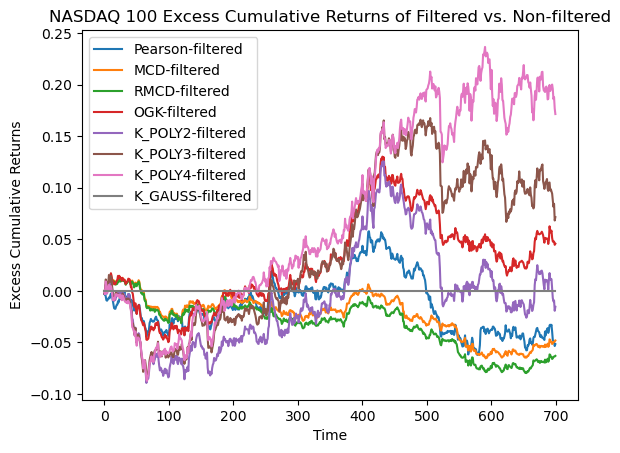

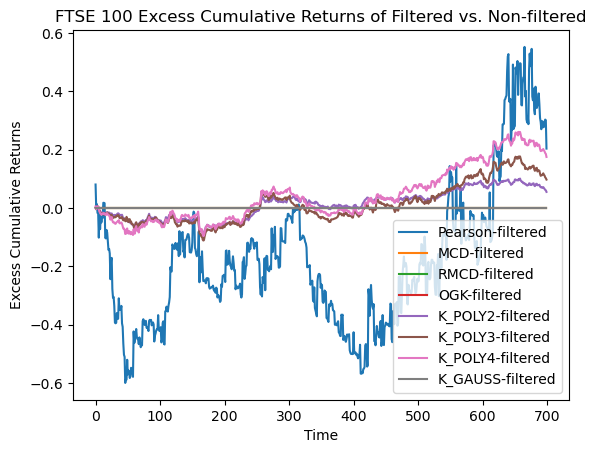

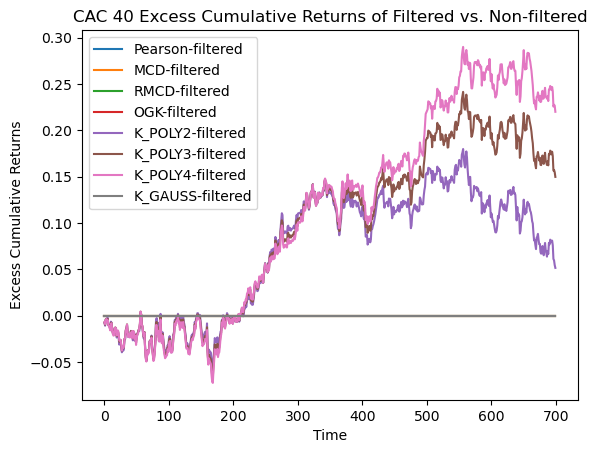

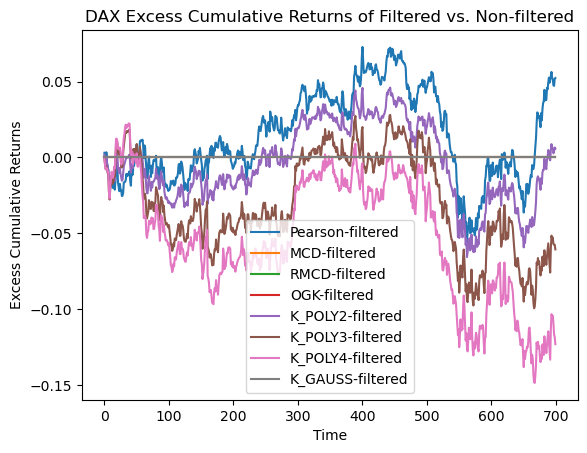

In [96]:
import matplotlib.pyplot as plt

for index in excess_cumulative_returns:
    pd.DataFrame(excess_cumulative_returns[index]).plot()
    plt.xlabel('Time')
    plt.ylabel('Excess Cumulative Returns')
    plt.title(index + ' Excess Cumulative Returns of Filtered vs. Non-filtered')
    plt.show()

We generally see the following discrepancies with the results presented in the paper, which can mainly be attributed to the lack of data for conducting experiments in our case. This is especially more visible from CAC 40 and DAX, indices for which we have very limited data, which exhibit more deviations from the results in the paper. 

(1) The number of non-noisy eigenvalues are extremely small, with the majority being 0 and few evaluating to 1 for NASDAQ 100 and FTSE 100.

(2) The p-values for both the Sharpe and Sortino ratio are mostly in an indeterminate area, indicating that we do not see statistically significant performance increase/decrease by adding noise-filtering.

(3) The proposed polynomial kernel covariance estimation method generally tends to outperform all other methods in terms of returns and Sharpe/Sortino ratios. The performances of the proposed Gaussian kernel and also the MCD methods are much less than expected from the paper.